## Naive Bayes (generative) model

Naive Bayes model predicts the likelihood of an event based on the evidence present in the test dataset. 

**Conditional probability and Bayes' rule:**  

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A) P(B|A)}{P(B)}  $$ 

Three types of Naive Bayes model:
1. Multinomial (categorical or continuos, discrete frequency)
2. Bernoulli (binary features)
3. Gaussian (continuous, normally distributed)

**Learning with practical dataset:**
Here we fit each class (independently) with a model. Say we have two classes with one dimensional probability distributions $P_1(x)$ and $P_2(x)$. 

Let's say our training set has $\pi_1$ fraction of class one and $\pi_2$ fraction of class two ($\pi_1 + \pi_2 = 1$). 

Now for a test point (x), we predict its class for which $\pi_iP_i(x)$ is maximum. Note that $\pi_i$ is determined based on our training dataset. 

The dataset is available at <https://archive.ics.uci.edu/ml/datasets/wine> or can be imported from scikit-learn datasets module.

In [1]:
# load python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 16

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

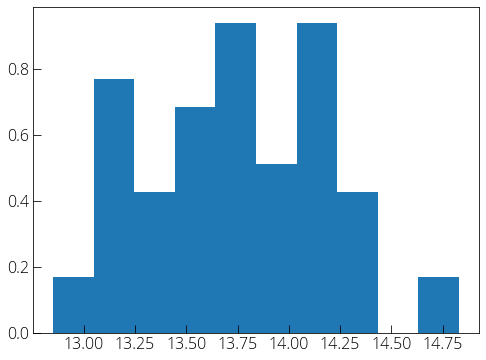

In [4]:
# Let's consider one feature (Alcohol) and plot it for the first category
cat1 = df.loc[data['target']==0]
plt.hist(cat1["alcohol"], density=True)
plt.show()

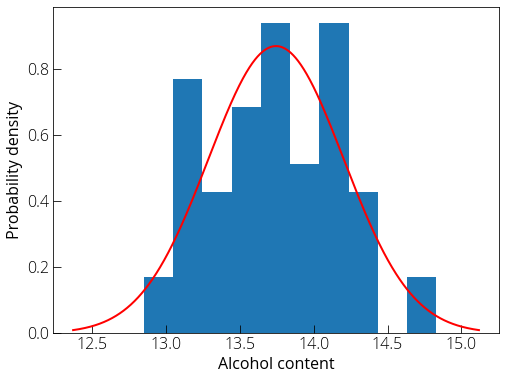

In [5]:
# Let's fit it with Gaussian distribution
mu = np.mean(cat1["alcohol"])                # mean
var = np.var(cat1["alcohol"])                # variance
std = np.sqrt(var)                           # standard deviation

x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
plt.hist(cat1["alcohol"], density=True)
plt.xlabel('Alcohol content')
plt.ylabel('Probability density')
plt.show()

We fit probabilty distribution ($P_i$) for each category. The probability of each category is simply the $\pi_i$ (frequency of that category)/(total sample size) in the training dataset. Now for a given new data, we simply calculate $\pi_i P_i$, and choose the label for which it is maximum. 

Now we will do the same using scikit learn modules. Where we will use all the predictor variable in the data.  

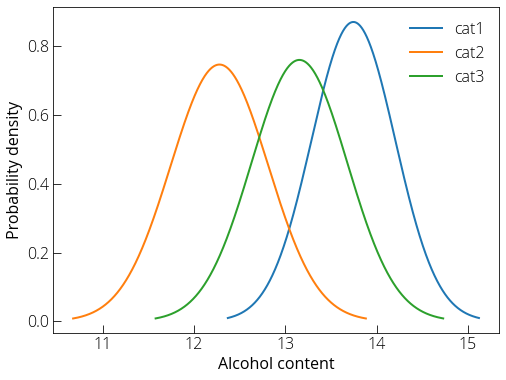

In [6]:
cat1 = df.loc[data['target']==0]
cat2 = df.loc[data['target']==1]
cat3 = df.loc[data['target']==2]

mu = np.mean(cat1["alcohol"])
var = np.var(cat1["alcohol"])
std = np.sqrt(var)

mu2 = np.mean(cat2["alcohol"])
var2 = np.var(cat2["alcohol"])
std2 = np.sqrt(var2)

mu3 = np.mean(cat3["alcohol"])
var3 = np.var(cat3["alcohol"])
std3 = np.sqrt(var3)

x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
x_axis2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 1000)
x_axis3 = np.linspace(mu3 - 3*std3, mu3 + 3*std3, 1000)
plt.plot(x_axis, norm.pdf(x_axis, mu, std), lw=2, label="cat1")
plt.plot(x_axis2, norm.pdf(x_axis2, mu2, std2), lw=2, label="cat2")
plt.plot(x_axis3, norm.pdf(x_axis3, mu3, std3), lw=2, label="cat3")

plt.xlabel('Alcohol content')
plt.ylabel('Probability density')
plt.legend(frameon=False)
plt.show()

In [7]:
# first do a train test split of our data
X, X_test, y, y_test = train_test_split(df, data['target'], test_size=0.3, random_state=0)

In [8]:
# check that we have sufficient data of each wine category 
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 40]
 [ 1 49]
 [ 2 35]]


In [9]:
print(np.asarray(np.unique(y_test, return_counts=True)).T)

[[ 0 19]
 [ 1 22]
 [ 2 13]]


In [10]:
GaussNB = GaussianNB()
GaussNB.fit(X, y)
GaussNB.predict([X_test.iloc[4]])

array([1])

In [11]:
y_test[:5]

array([0, 2, 1, 0, 1])

In [12]:
GaussNB.score(X_test, y_test)

0.9444444444444444